<a href="https://colab.research.google.com/github/kelvynlukito/DataScience_Practice_SVR/blob/main/DataScience_Practice_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Support Vector Regression**

---



# **Import Libraries**

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# **Import Dataset**

In [107]:
df = pd.read_csv('/content/Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [108]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [109]:
df.tail()

,Position,Level,Salary
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [110]:
df.shape

(10, 3)

In [111]:
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [112]:
df.isna().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [113]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [114]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [115]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [116]:
y = y.reshape(len(y),1)

In [117]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


# **Create Training & Testing Data**

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# **Feature Scaling**

In [119]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1,1))

In [ ]:
print(X)
print(y)

# **Training The SVR Model on Whole Dataset**

In [121]:
from sklearn.svm import SVR
regr = SVR(kernel='rbf')
regr.fit(X,y)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

# **Predict Result**

In [122]:
y_pred = scaler_y.inverse_transform(regr.predict(scaler_X.transform([[6.5]])).reshape(-1,1))
print(y_pred)

[[170370.0204065]]


In [123]:
y_pred = regr.predict(scaler_X.transform([[6.5]]))
y_pred_inverse = scaler_y.inverse_transform(y_pred.reshape(-1,1))
print(y_pred_inverse)

[[170370.0204065]]


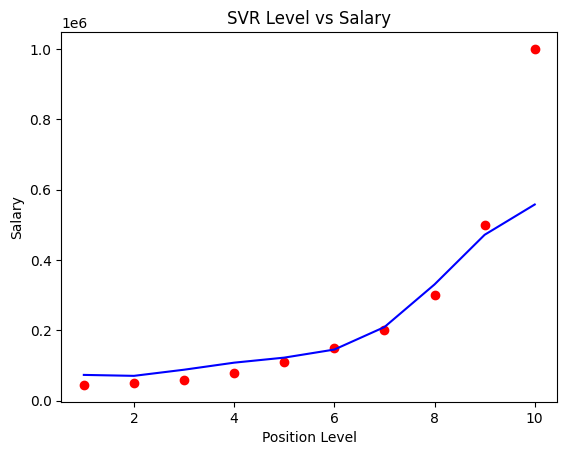

In [128]:
plt.scatter(scaler_X.inverse_transform(X), scaler_y.inverse_transform(y),color='red')
plt.plot(scaler_X.inverse_transform(X), scaler_y.inverse_transform(regr.predict(X).reshape(-1,1)), color='blue')
plt.title('SVR Level vs Salary')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

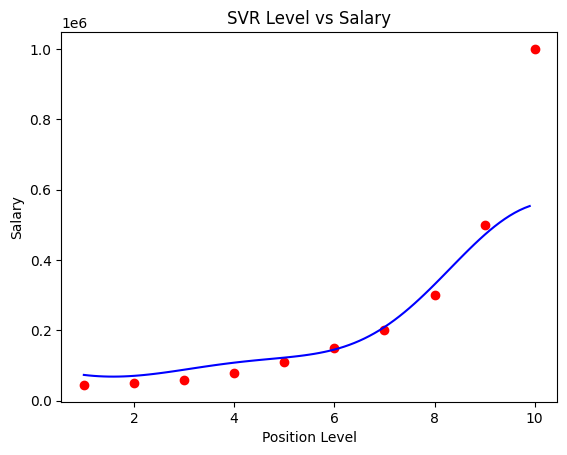

In [133]:
X_grid = np.arange(min(scaler_X.inverse_transform(X)),max(scaler_X.inverse_transform(X)),0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(scaler_X.inverse_transform(X), scaler_y.inverse_transform(y),color='red')
plt.plot(X_grid, scaler_y.inverse_transform(regr.predict(scaler_X.transform(X_grid)).reshape(-1,1)), color='blue')
plt.title('SVR Level vs Salary')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()